In [ ]:
!pip install pillow
import os
import random
from PIL import Image, ImageDraw, ImageFont
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Define directories to save synthetic images
text_dir = "/content/drive/MyDrive/ImageData/text"
no_text_dir = "/content/drive/MyDrive/ImageData/no_text"

os.makedirs(text_dir, exist_ok=True)
os.makedirs(no_text_dir, exist_ok=True)

def create_image_with_text(width=128, height=128, text="Sample Text"):
    image = Image.new('RGB', (width, height), color=(random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)))
    draw = ImageDraw.Draw(image)
    font = ImageFont.load_default()
    text_width, text_height = draw.textbbox((0, 0), text, font=font)[2:4]
    position = ((width - text_width) // 2, (height - text_height) // 2)
    draw.text(position, text, fill=(random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)), font=font)
    return image


In [ ]:
def create_image_without_text(width=128, height=128):
    image = Image.new('RGB', (width, height), color=(random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)))
    draw = ImageDraw.Draw(image)

    for _ in range(random.randint(5, 15)):  # Add 5 to 15 shapes
        shape_type = random.choice(["circle", "rectangle", "line"])
        if shape_type == "circle":
            x, y, r = random.randint(0, width), random.randint(0, height), random.randint(10, 30)
            draw.ellipse((x-r, y-r, x+r, y+r), outline="black", fill=(random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)))
        elif shape_type == "rectangle":
            x1, y1 = random.randint(0, width), random.randint(0, height)
            x2, y2 = random.randint(0, width), random.randint(0, height)
            draw.rectangle((x1, y1, x2, y2), outline="black", fill=(random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)))
        elif shape_type == "line":
            x1, y1 = random.randint(0, width), random.randint(0, height)
            x2, y2 = random.randint(0, width), random.randint(0, height)
            draw.line((x1, y1, x2, y2), fill=(random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)), width=2)

    return image

In [ ]:
# Generate and save more complex images
num_images = 1000  # Increase the number of images
image_list = []
labels = []


In [ ]:

for i in range(num_images):
    if i % 2 == 0:  # Alternate between images with and without text
        img = create_image_with_text()
        path = os.path.join(text_dir, f"text_{i}.png")
        img.save(path)
        labels.append("text")
    else:
        img = create_image_without_text()
        path = os.path.join(no_text_dir, f"no_text_{i}.png")
        img.save(path)
        labels.append("no_text")
    image_list.append(path)

In [ ]:

# Create a dataframe for splitting
import pandas as pd

data = pd.DataFrame({
    'image_path': image_list,
    'label': labels
})

# Split data into train, validation, and test sets
train_df, test_df = train_test_split(data, test_size=0.2, random_state=42, stratify=data['label'])
val_df, test_df = train_test_split(test_df, test_size=0.5, random_state=42, stratify=test_df['label'])

# Save data splits to text files
def save_split_to_txt(df, filename):
    with open(filename, 'w') as file:
        for _, row in df.iterrows():
            file.write(f"{row['image_path']} {row['label']}\n")

save_split_to_txt(train_df, '/content/drive/MyDrive/ImageData/train.txt')
save_split_to_txt(val_df, '/content/drive/MyDrive/ImageData/val.txt')
save_split_to_txt(test_df, '/content/drive/MyDrive/ImageData/test.txt')

print("Data saved to text files and split into train, validation, and test sets.")

Data saved to text files and split into train, validation, and test sets.


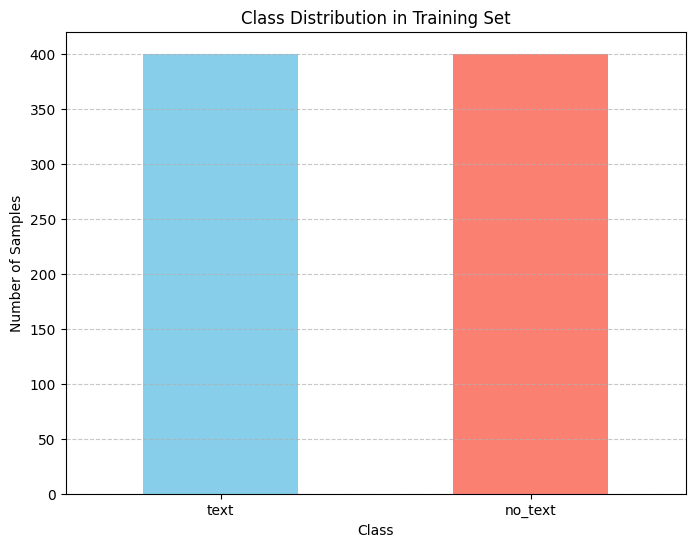

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from text files
def load_data(filename):
    data = pd.read_csv(filename, sep=' ', header=None, names=['image_path', 'label'])
    return data

# Paths to the text files
train_file = '/content/drive/MyDrive/ImageData/train.txt'
val_file = '/content/drive/MyDrive/ImageData/val.txt'
test_file = '/content/drive/MyDrive/ImageData/test.txt'

# Load datasets
train_data = load_data(train_file)
val_data = load_data(val_file)
test_data = load_data(test_file)

# Count class occurrences in each dataset
def count_classes(data):
    return data['label'].value_counts()

train_class_counts = count_classes(train_data)
# val_class_counts = count_classes(val_data)
# test_class_counts = count_classes(test_data)

# Create histograms
def plot_class_distribution(class_counts, title):
    plt.figure(figsize=(8, 6))
    class_counts.plot(kind='bar', color=['skyblue', 'salmon'])
    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Number of Samples')
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Plot histograms
plot_class_distribution(train_class_counts, 'Class Distribution in Training Set')
# plot_class_distribution(val_class_counts, 'Class Distribution in Validation Set')
# plot_class_distribution(test_class_counts, 'Class Distribution in Test Set')


In [ ]:
len(train_data)

800

In [ ]:
train_data

,image_path,label
0,/content/drive/MyDrive/ImageData/text/text_718...,text
1,/content/drive/MyDrive/ImageData/no_text/no_te...,no_text
2,/content/drive/MyDrive/ImageData/text/text_518...,text
3,/content/drive/MyDrive/ImageData/no_text/no_te...,no_text
4,/content/drive/MyDrive/ImageData/text/text_588...,text
...,...,...
795,/content/drive/MyDrive/ImageData/no_text/no_te...,no_text
796,/content/drive/MyDrive/ImageData/text/text_912...,text
797,/content/drive/MyDrive/ImageData/text/text_286...,text
798,/content/drive/MyDrive/ImageData/no_text/no_te...,no_text


In [ ]:
import os
import pandas as pd
from PIL import Image
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import torchvision.transforms as transforms
from tqdm import tqdm

In [ ]:
# Define paths
train_file = '/content/drive/MyDrive/ImageData/train.txt'
val_file = '/content/drive/MyDrive/ImageData/val.txt'
test_file = '/content/drive/MyDrive/ImageData/test.txt'
# Load data
def load_data(file_path):
    data = pd.read_csv(file_path, sep=" ", header=None, names=["img_path", "label"])
    data['label'] = data['label'].apply(lambda x: 1 if x == "text" else 0)
    return data
train_data = load_data(train_file)
val_data = load_data(val_file)
test_data = load_data(test_file)

In [ ]:
# Transform to preprocess the images
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

In [ ]:
# Function to load and preprocess images
def load_and_preprocess_images(data, transform):
    images = []
    labels = []
    for _, row in tqdm(data.iterrows(), total=len(data)):
        img_path = row['img_path']
        label = row['label']
        image = Image.open(img_path).convert("RGB")
        image = transform(image)
        image = np.array(image).flatten()  # Flatten the image
        images.append(image)
        labels.append(label)
    return np.array(images), np.array(labels)

In [ ]:
# Load and preprocess the images
X_train, y_train = load_and_preprocess_images(train_data, transform)
X_val, y_val = load_and_preprocess_images(val_data, transform)
X_test, y_test = load_and_preprocess_images(test_data, transform)

# Train logistic regression model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)



100%|██████████| 100/100 [00:00<00:00, 106.30it/s]


LogisticRegression(max_iter=1000)

In [ ]:
len(X_train)

800

In [ ]:
# Evaluate the model
y_pred_train = clf.predict(X_train)
y_pred_val = clf.predict(X_val)
y_pred_test = clf.predict(X_test)

# Print accuracy and classification report
print("Train Accuracy: ", accuracy_score(y_train, y_pred_train))
print("Validation Accuracy: ", accuracy_score(y_val, y_pred_val))
print("Test Accuracy: ", accuracy_score(y_test, y_pred_test))

print("Classification Report (Test):")
print(classification_report(y_test, y_pred_test))

Train Accuracy:  1.0
Validation Accuracy:  0.58
Test Accuracy:  0.6
Classification Report (Test):
              precision    recall  f1-score   support

           0       1.00      0.20      0.33        50
           1       0.56      1.00      0.71        50

    accuracy                           0.60       100
   macro avg       0.78      0.60      0.52       100
weighted avg       0.78      0.60      0.52       100



In [ ]:
import numpy as np
import pandas as pd

# Placeholder for the model's prediction function
def model_predict(input_data):
    # Replace with your actual model's prediction function
    return np.random.choice([0, 1], size=len(input_data))

# Function to evaluate functional correctness
def functional_testing(model, test_data, true_labels):
    predictions = model_predict(test_data)
    accuracy = np.mean(predictions == true_labels)
    print(f"Functional Testing: Accuracy = {accuracy:.2f}")
    return accuracy

# Function to check for biases and ethical concerns
def responsibility_testing(model, test_data, sensitive_features):
    predictions = model_predict(test_data)

    # Example: Check for gender bias
    bias_results = {}
    for feature in sensitive_features:
        unique_values = test_data[feature].unique()
        bias_results[feature] = {}

        for value in unique_values:
            subset = test_data[test_data[feature] == value]
            subset_predictions = model_predict(subset)
            bias_results[feature][value] = np.mean(subset_predictions)

    print("Responsibility Testing: Bias Results")
    for feature, results in bias_results.items():
        print(f"Feature: {feature}")
        for value, bias_score in results.items():
            print(f"  Value: {value} - Bias Score: {bias_score:.2f}")

    return bias_results

# Placeholder test data and labels
data = {
    'feature1': np.random.rand(100),
    'feature2': np.random.rand(100),
    'gender': np.random.choice(['male', 'female'], size=100),
    'age': np.random.choice(['young', 'middle', 'old'], size=100)
}
test_data = pd.DataFrame(data)
true_labels = np.random.choice([0, 1], size=100)  # Replace with your actual labels
sensitive_features = ['gender', 'age']  # Replace with your actual sensitive features

# Perform functional testing
functional_accuracy = functional_testing(model_predict, test_data, true_labels)

# Perform responsibility testing
bias_results = responsibility_testing(model_predict, test_data, sensitive_features)


Functional Testing: Accuracy = 0.50
Responsibility Testing: Bias Results
Feature: gender
  Value: female - Bias Score: 0.48
  Value: male - Bias Score: 0.44
Feature: age
  Value: old - Bias Score: 0.44
  Value: middle - Bias Score: 0.44
  Value: young - Bias Score: 0.50
